# Data Analysis

In this dataset, we explored some data on terrorism, which is re-emerging as a hot topic due to the recent developments around the world, as well as due to the ongoing Russia-Ukraine War. According to Britannica, terrorism's goal is to "destroy the public's sense of security in the places most familiar to them". Inciting fear among those that we live with and using individual personal ideologies against each other.

In order to better understand the why behind terrorism, we made use of EDA tools to help us analyse the key triggers of such attacks.

This is a huge dataset which consists of over 200,000 terrorist attacks that occurred all around the world from 1970 to 2017. Only consisting of those attacks that have been planned and executed. This database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquarted at the Univeristy of Maryland.

More info on the Global Terrorism Database: https://www.start.umd.edu/gtd/access/

# What makes a successful terrorist attack?
To reverse engineer things a little bit, we wanted to understand what made a successful terrorist attack, or what didn't. Once we are able to find out the most important factor or factors that determine the potential critical outcome, then we would be able to target efforts towards that area, to prevent more of such devasting events from occuring.

## Sample Collection

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Map stuff
import folium
from folium.plugins import MarkerCluster

# Misc
from collections import Counter
sns.set()
%matplotlib inline

In [ ]:
# GTD Dataset from 1970 - 2017
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding = "ISO-8859-1")

/Users/mel_ng/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, consulate)",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         float64
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           float64
 23   alternative         float64
 24 

### While finding the number of yearly casualties...

In [ ]:
df['casualties'] = df['nkill'] + df['nwound']
casualties_by_year = df.groupby('iyear')['casualties'].sum().to_frame().reset_index()
casualties_by_year.columns = ['Year', 'Casualty Count']
px.bar(data_frame=casualties_by_year, x='Year', y='Casualty Count', width=1000, height=600) 

### It turns out that...

<b>Observation</b><br>
1993 is empty - were there really no terrorist attacks in 1993?

Unfortunately, this is not true: https://en.wikipedia.org/wiki/List_of_terrorist_incidents_in_1993

![image.png](attachment:73e67f79-1b3e-4576-9cd3-5547f367b368.png)

It appears that there were terrorist attacks in 1993 - and this was not accounted for in the dataset.
We did a little more digging and it turns out that on the site, there is a separate dataset for the year 1993. Although there was no mention of why it was separated like so. We combined both of the dataset to make it a more complete one.

In [ ]:
# GTD Dataset 1993
dftemp = pd.read_csv("gtd1993_0221dist.csv")
df = pd.concat([df,dftemp])

In [ ]:
df['casualties'] = df['nkill'] + df['nwound']
casualties_by_year = df.groupby('iyear')['casualties'].sum().to_frame().reset_index()
casualties_by_year.columns = ['Year', 'Casualty Count']
px.bar(data_frame=casualties_by_year, x='Year', y='Casualty Count', width=1000, height=600) 

### Voilà, we have a more comprehensive dataset to work with!

<b>Conclusion on GTD</b><br>
After adding in the 1993 dataset, it's more complete dataset to work with.

On top of this, we realised that even though the number of terrorist events are increasing, there is still quite a large gap between the number of events and the number of casualities. We would have to take this into consideration because even minor scale terrorism events are included in the dataset.

With some of these insights in mind, we move on to explore the dataset more. 

Just to reiterate our question once more: <b>What makes a successful terrorist attack?</b>

## Exploratory Data Analysis

In [ ]:
# mapData=df.loc[:,'city':'longitude']
# mapData=mapData.dropna().values.tolist()

# map_locations = folium.Map(location = [0, 50], tiles='CartoDB positron', zoom_start=2) 
# markerCluster = folium.plugins.MarkerCluster().add_to(map_locations)
# for point in range(0, len(mapData)):
#     folium.Marker(location=[mapData[point][1],mapData[point][2]],
#                   popup = mapData[point][0]).add_to(markerCluster)

In [ ]:
# map_locations

https://colab.research.google.com/drive/1QjdsShmruAq8JPb9NnuFXCYqtT1IoOy8?usp=sharing

### Number of Terrorist Attacks (By Year)

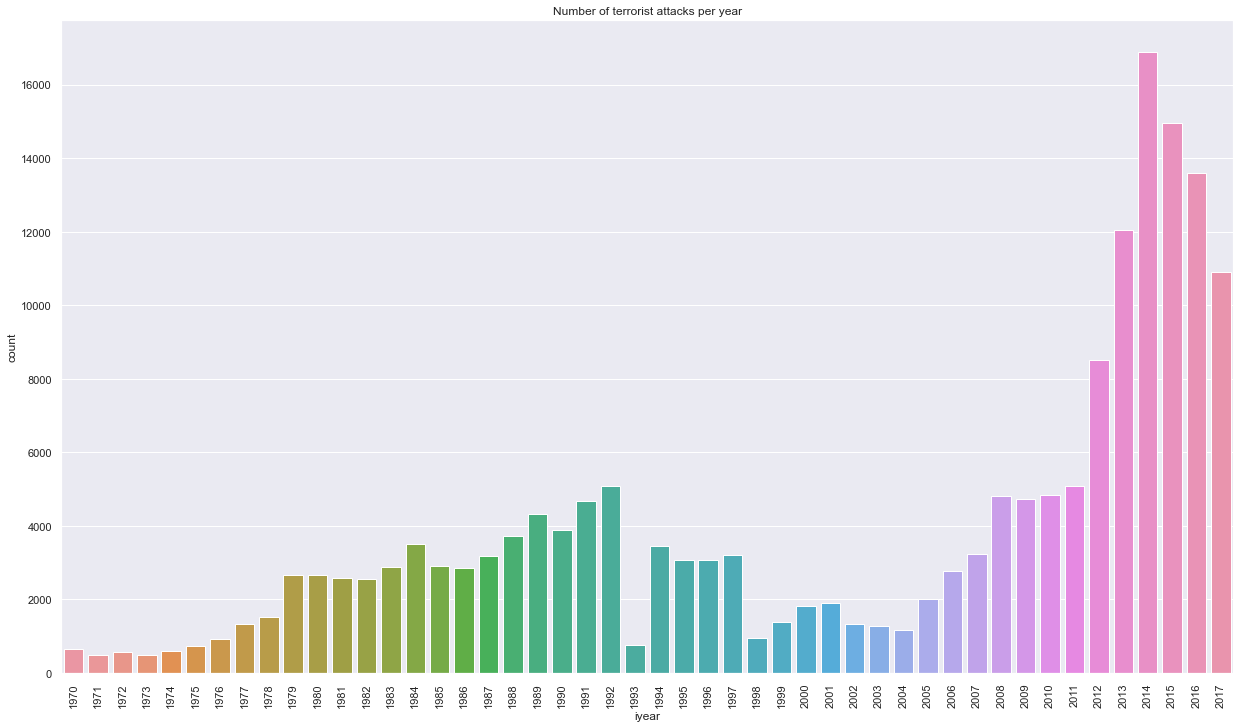

In [ ]:
plt.figure(figsize=(21, 12))
sns.countplot(x="iyear", data=df)
plt.xticks(rotation=90)
plt.title("Number of terrorist attacks per year")
plt.show()

<b>Observation</b><br>
There is an obvious incline of attacks as the years pass by. We would like to highlight the huge spike in the number of terrorist attacks from 2011 onwards. With the year 2015 having nearly 17000 reported terrorist attacks.

Let's now also find out if the number of attacks is strongly correlated to the number of casualties.

### Number of Successful attacks (By Year)

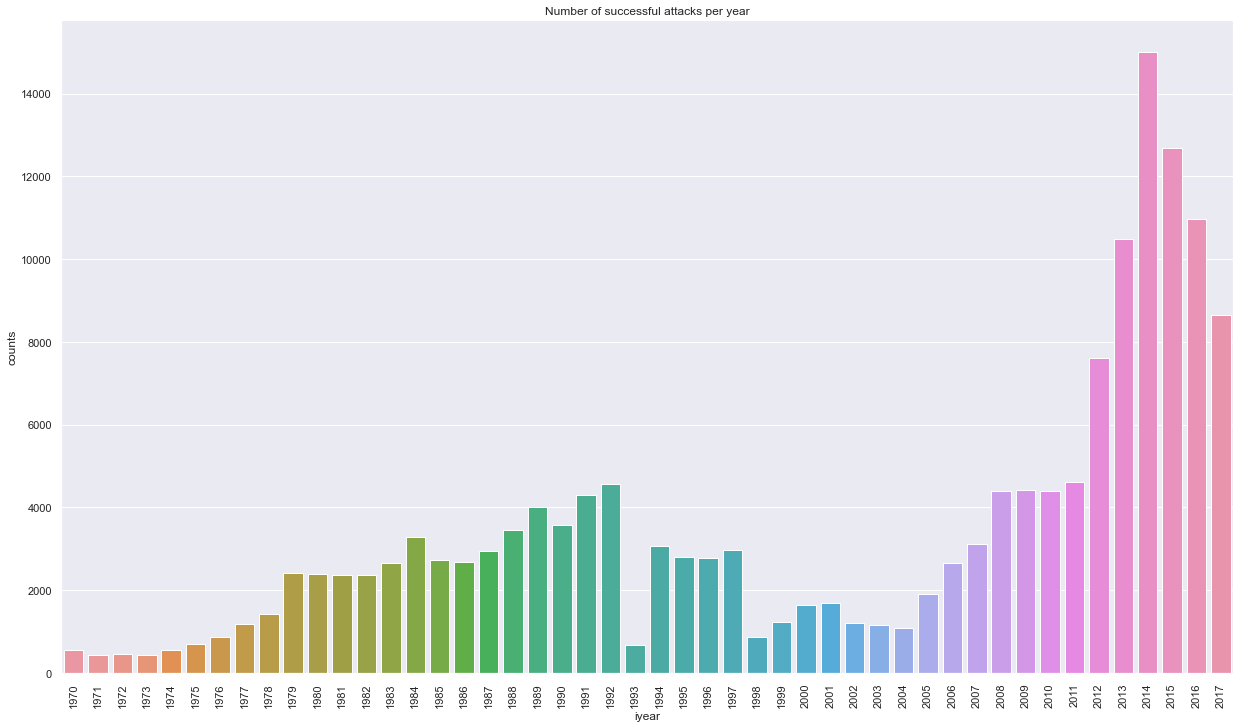

In [ ]:
plt.figure(figsize=(21, 12))
sns.barplot(x="iyear", y="counts", data=df[df["success"] == 1].groupby(["iyear", "success"]).size().reset_index(name="counts"))
plt.xticks(rotation=90)
plt.title("Number of successful attacks per year")
plt.show()
# df[df["success"] == 1].groupby(["iyear", "success"]).size().reset_index(name="counts")

### Number of failed attacks (By Year)

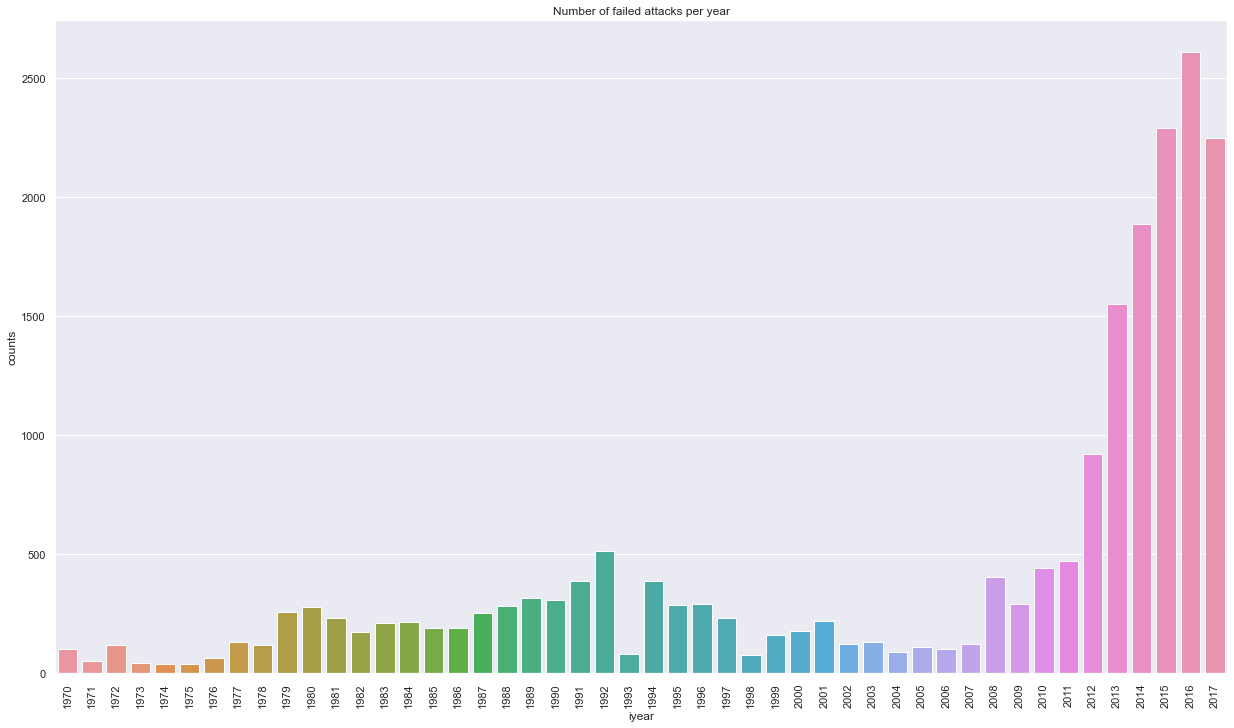

In [ ]:
plt.figure(figsize=(21, 12))
sns.barplot(x="iyear", y="counts", data=df[df["success"] == 0].groupby(["iyear", "success"]).size().reset_index(name="counts"))
plt.xticks(rotation=90)
plt.title("Number of failed attacks per year")
plt.show()

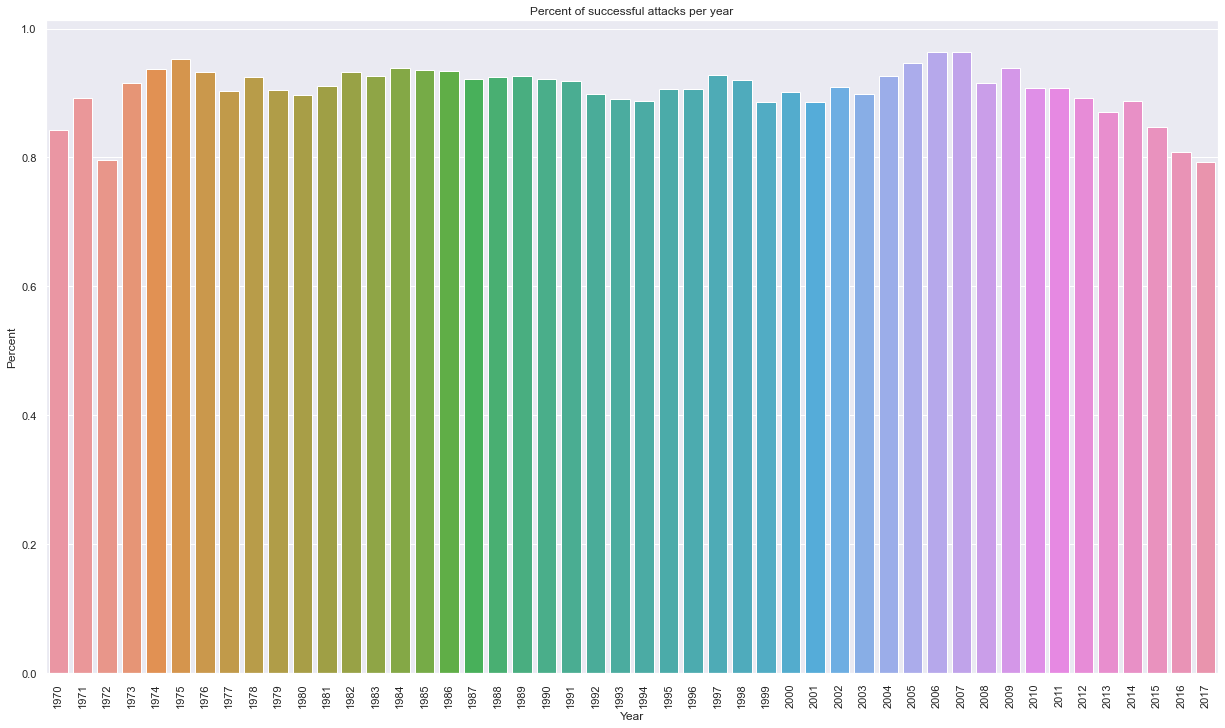

In [ ]:
successattack = df[df["success"] == 1].groupby(["iyear", "success"]).size().reset_index(name="counts")
failattack = df[df["success"] == 0].groupby(["iyear", "success"]).size().reset_index(name="counts")
ratio_sf = successattack["counts"]/(successattack["counts"] + failattack["counts"])
ratio_sf = ratio_sf.reset_index(name="percent")
ratio_sf.columns=["Year", "Percent"]
ratio_sf["Year"] += 1970
ratio_sf

plt.figure(figsize=(21, 12))
sns.barplot(x="Year", y="Percent", data=ratio_sf)
plt.xticks(rotation=90)
plt.title("Percent of successful attacks per year")
plt.show()

### Number of Casualties (By Year)

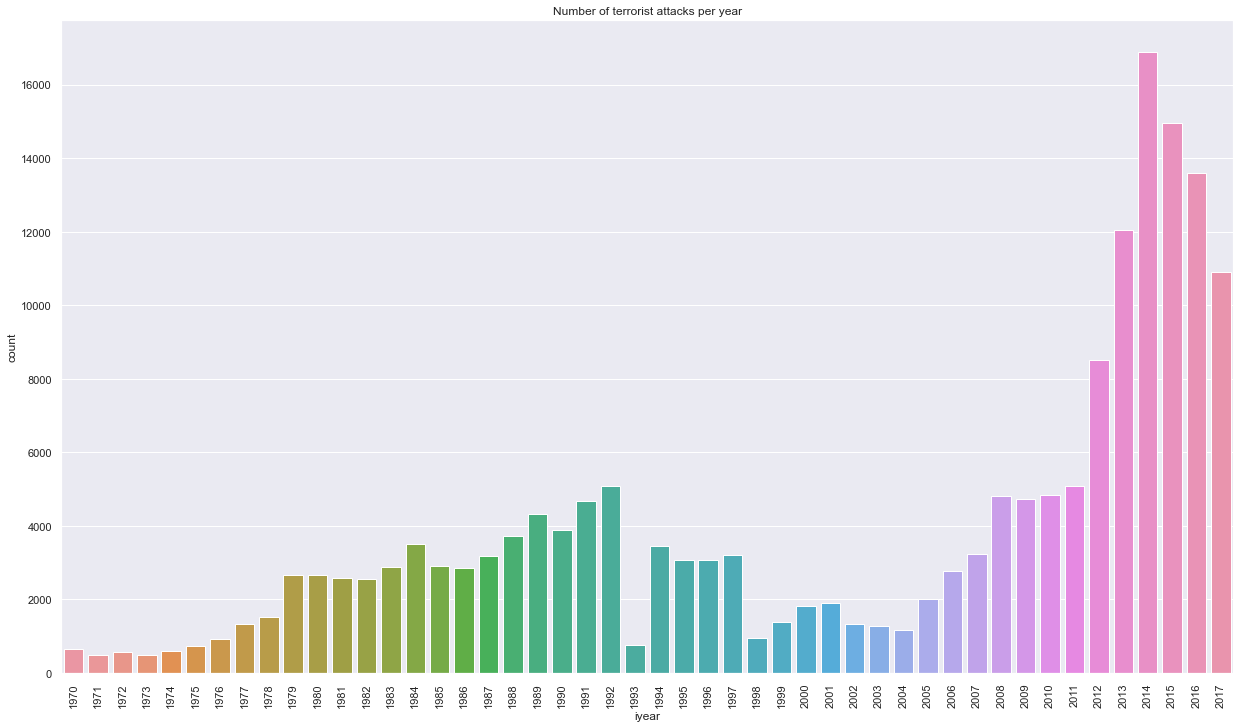

In [ ]:
plt.figure(figsize=(21, 12))
sns.barplot(x="iyear", y="counts", data=df.groupby(["iyear"])["casualties"].sum().reset_index(name="counts"))
plt.xticks(rotation=90)
plt.title("Number of casualties due to attacks per year")
plt.show()

<b>Observation</b><br>
This insight was also briefly mentioned before in the previous segment: "Sample Collection".

But now, just by taking a look at the scale of the graphs of "Number of Terrorist Attacks (By Year)" and "Number of Casualties (By Year)", we can see that the scale of "Number of Terrorist Attacks (By Year)" is almost double that of "Number of Casualties (By Year)". Although this is nothing to be happy about, it does imply that the number of terrorist attacks that occur is generally greateer than the number of casualties .

One more thing that we would have to add to our list of consideration is that the term "terrorist attack" would include small scale attacks as well.

### Countries that were attacked the most

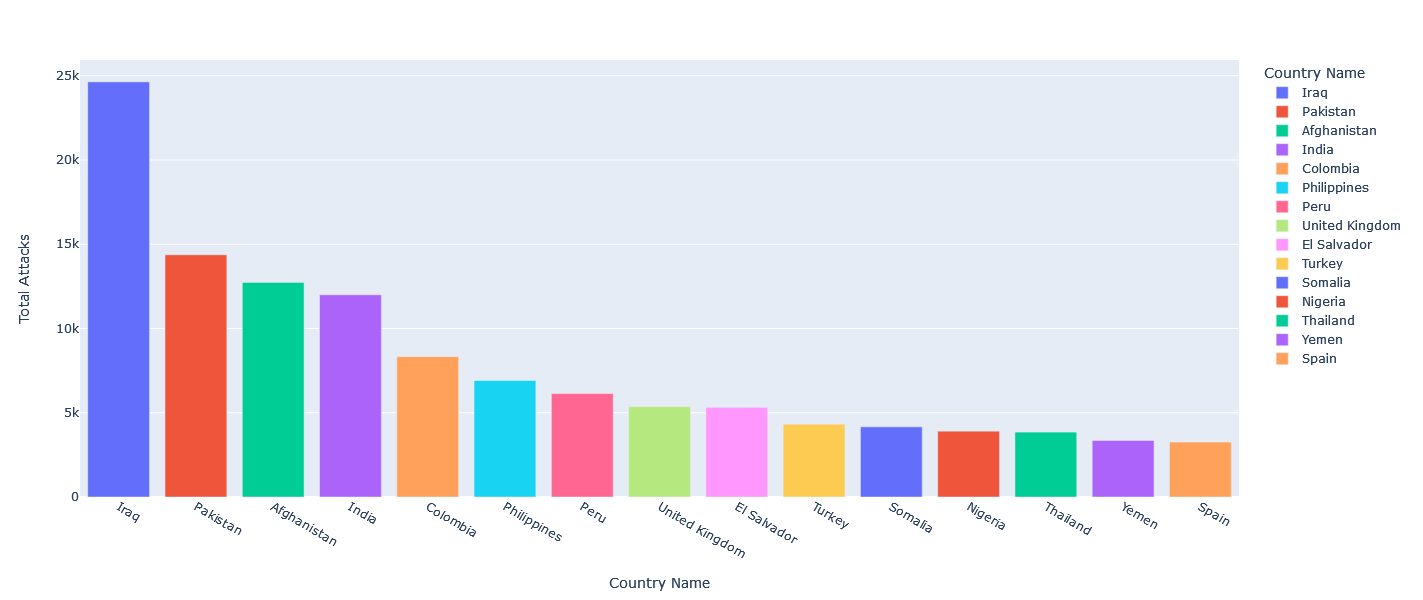

In [ ]:
attack_count = df.country_txt.value_counts()[:15].reset_index()
attack_count.columns = ["Country Name", "Total Attacks"]
px.bar(data_frame=attack_count, x="Country Name", y="Total Attacks", color="Country Name", width=1000, height=600)

<b>Observation</b><br>
The top 4 most targeted countries by far are Iraq, Pakistan, Afganistan and India. But what is it about these countries that make them a target?

Here we go on to explore more about the background of the targeted parties.

### Most Targeted Parties

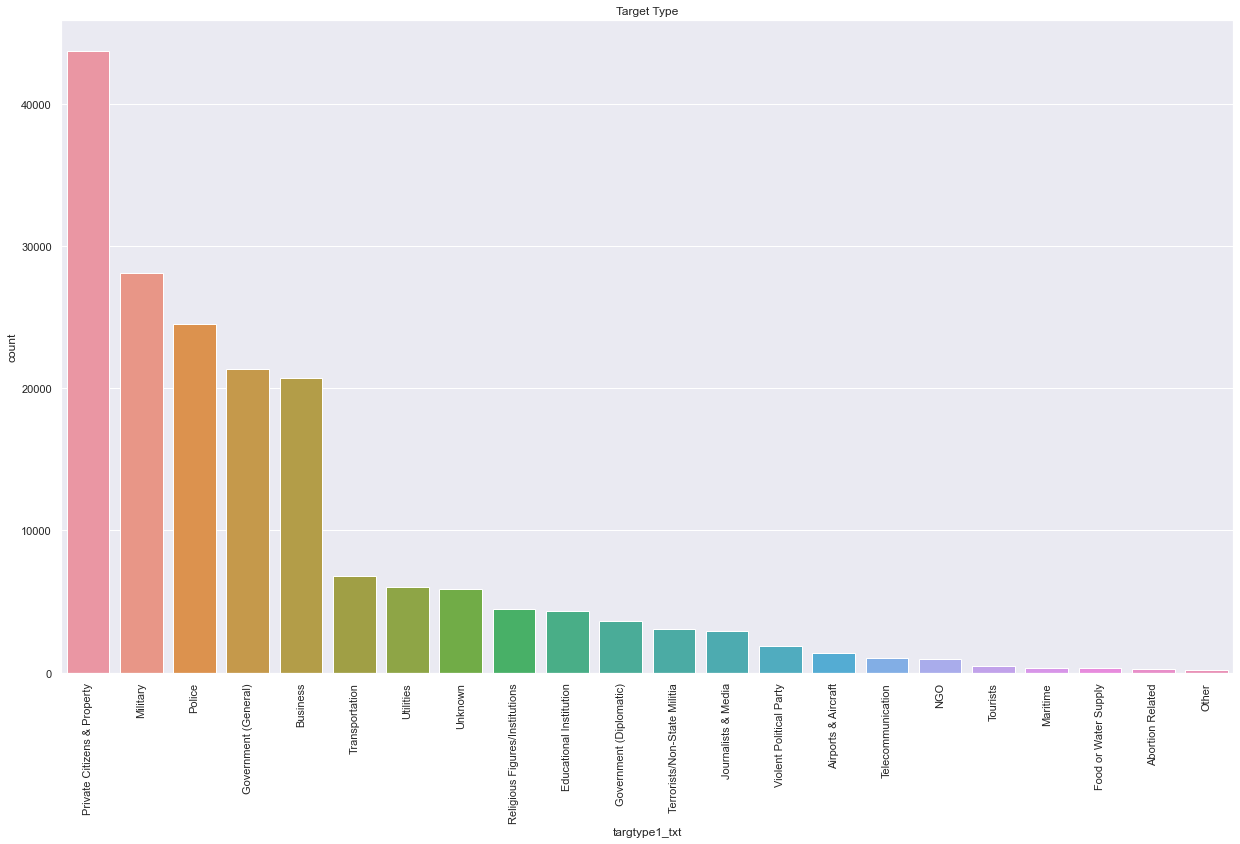

In [ ]:
plt.figure(figsize=(21, 12))
sns.countplot(x="targtype1_txt", data=df, order = df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Target Type")
plt.show()

<b>Observation</b><br>
This was a little astonishing to observe because we originally thought that the most targetted party would actually be the government body, seeing that they are the most involved with politics and are public facing. Meaning that if they were a target, the impact could be much more than if they were to attack private citizens and property.

### Attack Types

In [ ]:
## value counts for attack type

attckDF = df["attacktype1_txt"].value_counts()
attckDF

Bombing/Explosion                      88525
Armed Assault                          42898
Assassination                          19349
Hostage Taking (Kidnapping)            11193
Facility/Infrastructure Attack         10503
Unknown                                 7286
Unarmed Assault                         1016
Hostage Taking (Barricade Incident)      999
Hijacking                                670
Name: attacktype1_txt, dtype: int64

### Attack Types

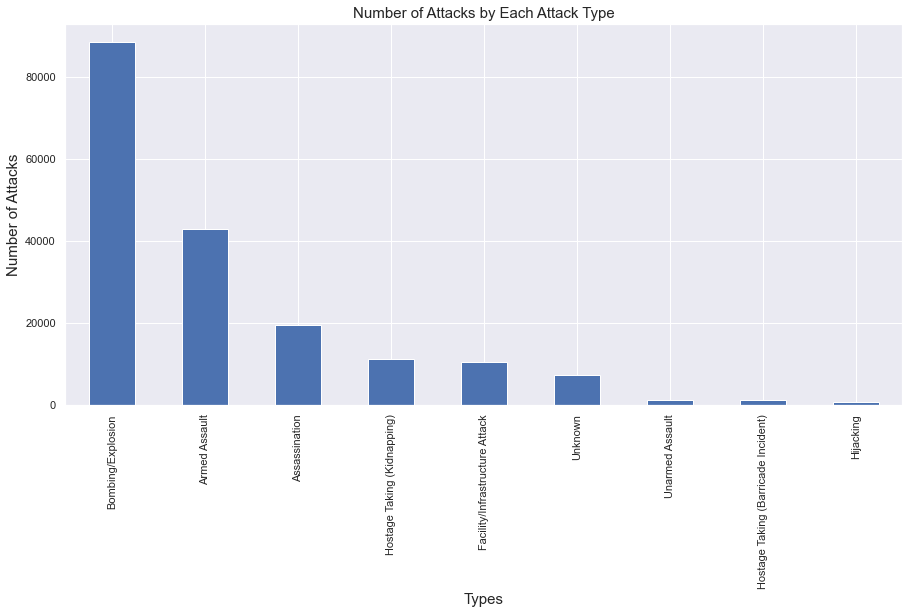

In [ ]:
## Visualising the attack type plot

attckDF.plot(kind='bar',figsize=(15,7))
plt.title("Number of Attacks by Each Attack Type", fontsize=15)
plt.xlabel('Types', fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.show()

<b>Observation</b><br>
Mostly the attacks that were planned were those that involved some kind of explosives. Second being armed assaults and third being assasinations. 

There is a small section that involve unkown attack types, hence we would have to keep it in mind that our conclusion might not be able to predict an unknown/new category of attacks, seeing how technology is progressing at such a great pace.

### Correlation between Success and Fields Mentioned Above

First off, how many successes have we had out of all of the records?

In [ ]:
successDF = df['success']
print(successDF.shape)
print(successDF.value_counts(dropna=False))

(182439,)
1.0    162298
0.0     20140
NaN         1
Name: success, dtype: int64


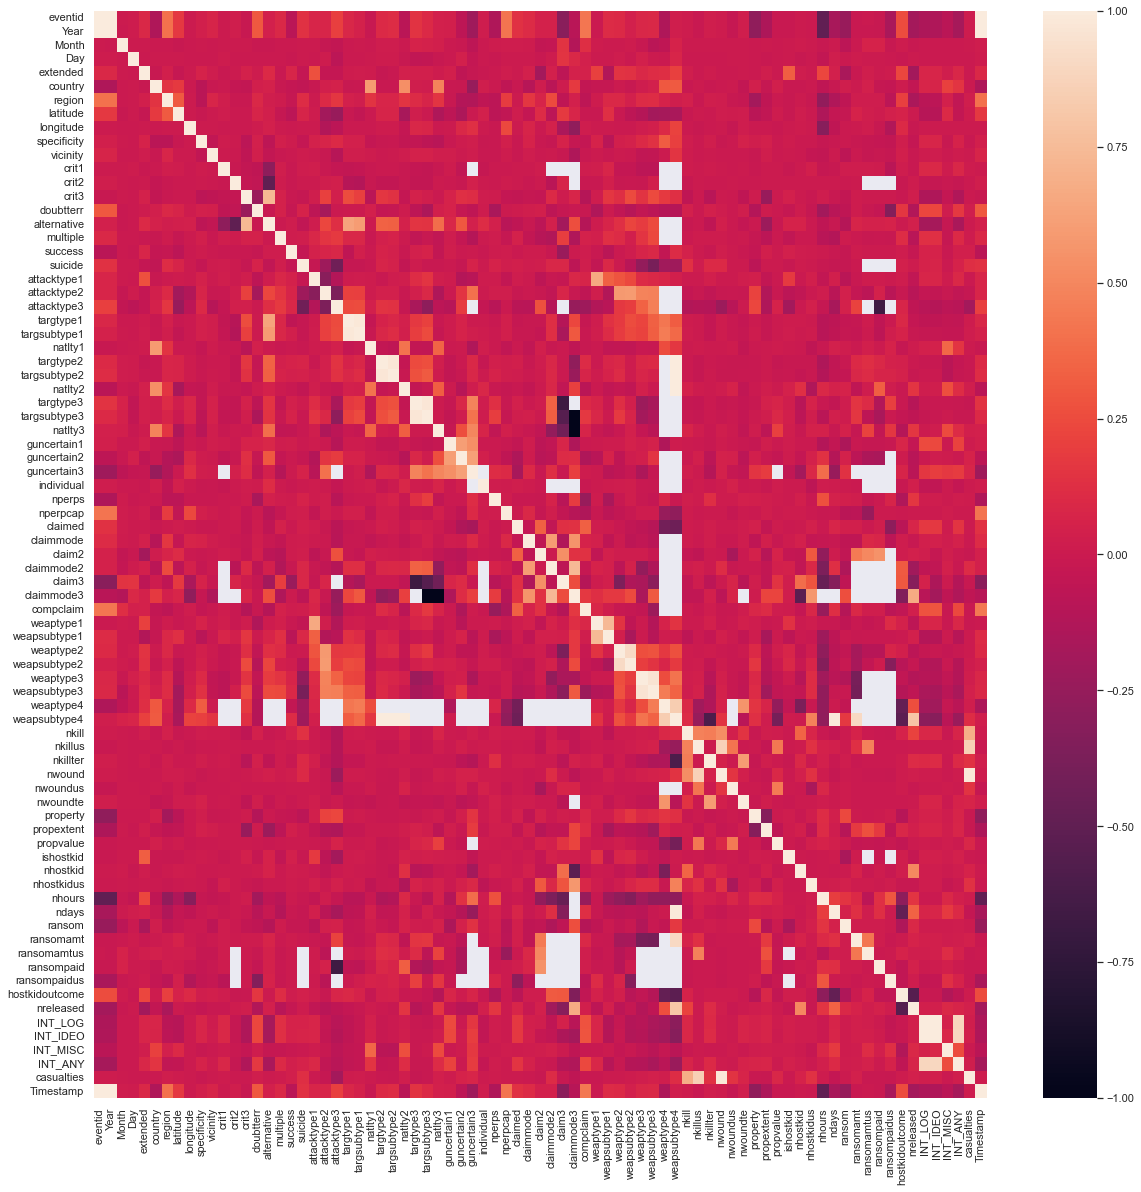

In [ ]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
df = df.rename(columns={'iyear': "Year", 'imonth': "Month", 'iday': "Day"})
df = df[df['Day'] != 0]
df = df[df['Month'] != 0]
df['Timestamp'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['Timestamp'] = df['Timestamp'].astype(str) + ' 00:00'
df['Timestamp'] = pd.to_datetime(df['Timestamp']).values.astype(int) / 10**9

# print(df.head())

# print(df.corr()['success'])
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(), ax=ax)
plt.savefig("CorrelationMatrix1.jpg")

In [ ]:
df.corr()['success']

eventid          -0.083034
Year             -0.083025
Month            -0.002776
Day              -0.011159
extended          0.072890
country          -0.037320
region           -0.030852
latitude         -0.073569
longitude        -0.000860
specificity       0.014520
vicinity         -0.002236
crit1            -0.010582
crit2            -0.013825
crit3            -0.013710
doubtterr        -0.027952
alternative       0.017502
multiple          0.020577
success           1.000000
suicide          -0.031536
attacktype1       0.048049
attacktype2       0.063222
attacktype3       0.085647
targtype1        -0.059449
targsubtype1      0.038268
natlty1          -0.005733
targtype2         0.057558
targsubtype2      0.042944
natlty2          -0.011934
targtype3         0.043399
targsubtype3      0.056855
natlty3          -0.040841
guncertain1       0.025466
guncertain2      -0.004164
guncertain3       0.005253
individual       -0.014192
nperps            0.011490
nperpcap          0.015781
c

"For attacks that took place between 1970 and 2011, if the exact month of the event is unknown, this is recorded as “0.” For attacks that took place after 2011, if the exact month of the event is unknown, this is recorded as the midpoint of the range of possible dates reported in source materials and the full range is recorded in the Approximate Date (approxdate) field."

Taking this from the codebook, it seems that there are values in the months column that have the value 0. Since these information is not useful to our analysis of the dataset, removing them would be the chosen option.

Taking a look through the 76 individual fields, it is also quite shocking to understand that there is no 1 field that strongly correlates with the success rate of the attack. They are mostly around the 0 value mark, which does not give us a strong indication that we can use a single field to predict the outcome.

But no fear, our next plan would be to try to find a combination of fields that can better correlate with the outcome.